In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv(r"D:\Excel\ai_financial_market_daily_realistic_synthetic.csv")
print(df)

             Date Company  R&D_Spending_USD_Mn  AI_Revenue_USD_Mn  \
0      2015-01-01  OpenAI                 5.92               0.63   
1      2015-01-02  OpenAI                 5.41               1.81   
2      2015-01-03  OpenAI                 4.50               0.61   
3      2015-01-04  OpenAI                 5.45               0.95   
4      2015-01-05  OpenAI                 3.40               1.48   
...           ...     ...                  ...                ...   
10954  2024-12-27    Meta               100.19             103.54   
10955  2024-12-28    Meta                99.12             102.37   
10956  2024-12-29    Meta                98.95             103.11   
10957  2024-12-30    Meta               100.74             103.21   
10958  2024-12-31    Meta               100.08             103.41   

       AI_Revenue_Growth_% Event  Stock_Impact_%  
0                   -36.82   NaN           -0.36  
1                    80.59   NaN            0.41  
2                 

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10959 entries, 0 to 10958
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 10959 non-null  object 
 1   Company              10959 non-null  object 
 2   R&D_Spending_USD_Mn  10959 non-null  float64
 3   AI_Revenue_USD_Mn    10959 non-null  float64
 4   AI_Revenue_Growth_%  10959 non-null  float64
 5   Event                233 non-null    object 
 6   Stock_Impact_%       10959 non-null  float64
dtypes: float64(4), object(3)
memory usage: 599.4+ KB


In [5]:
print(df.isnull().sum())

Date                   0
Company                0
R&D_Spending_USD_Mn    0
AI_Revenue_USD_Mn      0
AI_Revenue_Growth_%    0
Event                  0
Stock_Impact_%         0
dtype: int64


In [4]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Fill missing Event column with "No Event"
df['Event'] = df['Event'].fillna("No Event")

In [6]:
#duplicates checked
duplicates=df.duplicated().sum()
print(duplicates)

0


In [7]:
print(df.describe(include='all'))

                                 Date Company  R&D_Spending_USD_Mn  \
count                           10959   10959         10959.000000   
unique                            NaN       3                  NaN   
top                               NaN  OpenAI                  NaN   
freq                              NaN    3653                  NaN   
mean    2020-01-01 00:00:00.000000256     NaN            65.184504   
min               2015-01-01 00:00:00     NaN             1.570000   
25%               2017-07-02 00:00:00     NaN             8.640000   
50%               2020-01-01 00:00:00     NaN            70.960000   
75%               2022-07-02 00:00:00     NaN            99.600000   
max               2024-12-31 00:00:00     NaN           163.830000   
std                               NaN     NaN            47.918247   

        AI_Revenue_USD_Mn  AI_Revenue_Growth_%     Event  Stock_Impact_%  
count        10959.000000         10959.000000     10959    10959.000000  
unique   

In [8]:
# Correlation matrix
corr = df.corr(numeric_only=True)
print("\nCorrelation Matrix:\n", corr)


Correlation Matrix:
                      R&D_Spending_USD_Mn  AI_Revenue_USD_Mn  \
R&D_Spending_USD_Mn             1.000000           0.935030   
AI_Revenue_USD_Mn               0.935030           1.000000   
AI_Revenue_Growth_%             0.291245           0.530128   
Stock_Impact_%                 -0.004628          -0.000017   

                     AI_Revenue_Growth_%  Stock_Impact_%  
R&D_Spending_USD_Mn             0.291245       -0.004628  
AI_Revenue_USD_Mn               0.530128       -0.000017  
AI_Revenue_Growth_%             1.000000        0.020937  
Stock_Impact_%                  0.020937        1.000000  


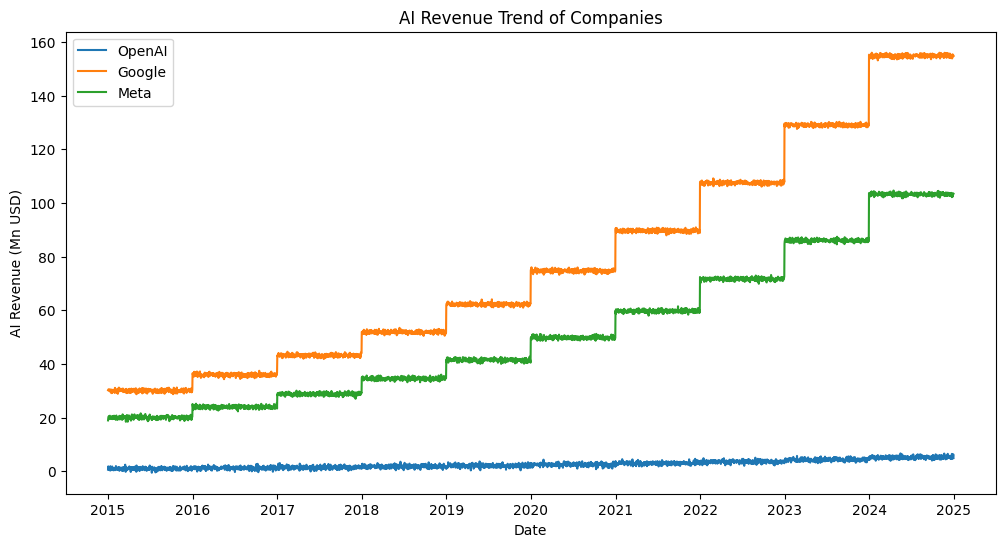

In [9]:
# --- Trend of AI Revenue Over Time ---
plt.figure(figsize=(12,6))
for company in df['Company'].unique()[:5]:  # first 5 companies
    subset = df[df['Company']==company]
    plt.plot(subset['Date'], subset['AI_Revenue_USD_Mn'], label=company)
plt.title("AI Revenue Trend of Companies")
plt.xlabel("Date")
plt.ylabel("AI Revenue (Mn USD)")
plt.legend()
plt.show()

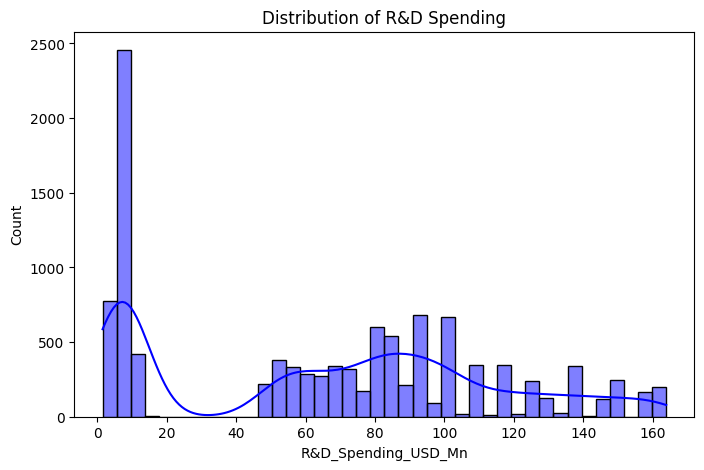

In [10]:
# --- Distribution of R&D Spending ---
plt.figure(figsize=(8,5))
sns.histplot(df['R&D_Spending_USD_Mn'], bins=40, kde=True, color="blue")
plt.title("Distribution of R&D Spending")
plt.show()

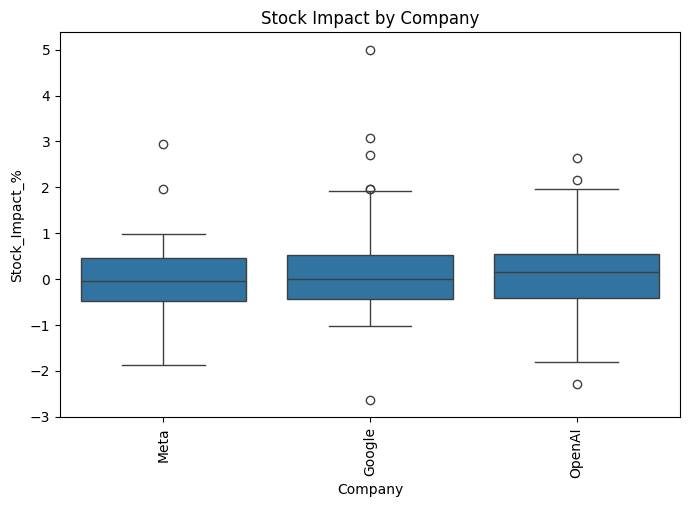

In [11]:
# --- Stock Impact Distribution ---
plt.figure(figsize=(8,5))
sns.boxplot(x="Company", y="Stock_Impact_%", data=df.sample(1000))  # sample to avoid crowd
plt.xticks(rotation=90)
plt.title("Stock Impact by Company")
plt.show()

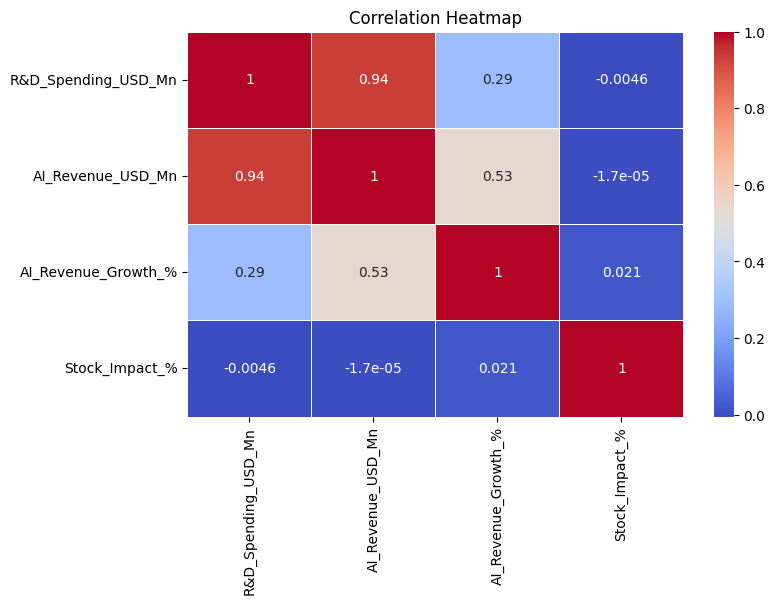

In [12]:
# --- Correlation Heatmap ---
plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

C:\Users\shrey\AppData\Local\Temp\ipykernel_14124\3283270658.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=event_impact.values, y=event_impact.index, palette="viridis")


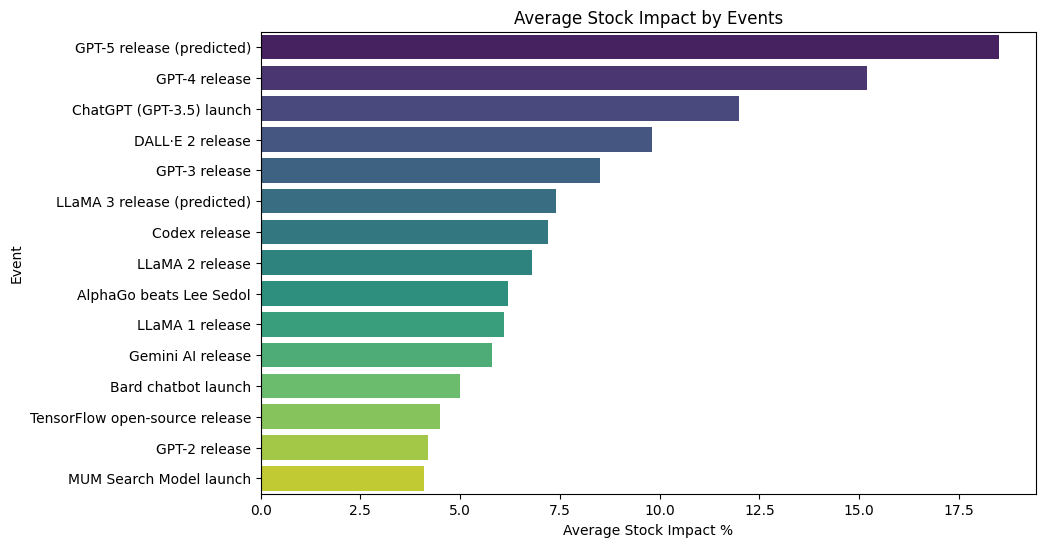

In [13]:
# --- Events vs Stock Impact ---
plt.figure(figsize=(10,6))
event_impact = df.groupby("Event")["Stock_Impact_%"].mean().sort_values(ascending=False).head(15)
sns.barplot(x=event_impact.values, y=event_impact.index, palette="viridis")
plt.title("Average Stock Impact by Events")
plt.xlabel("Average Stock Impact %")
plt.ylabel("Event")
plt.show()

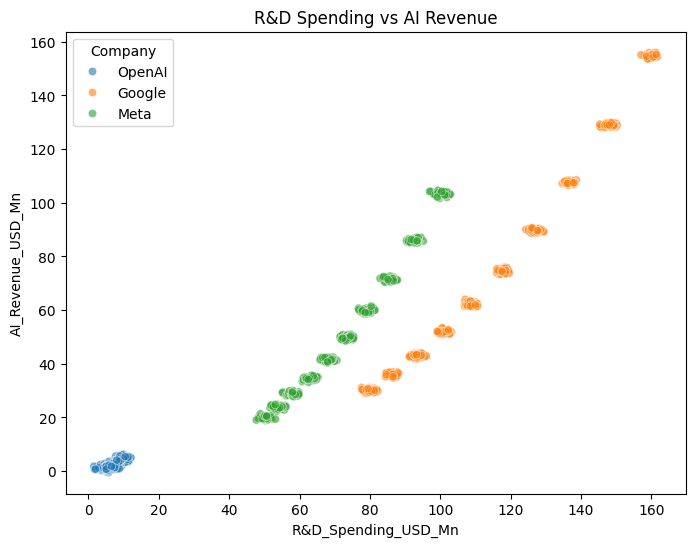

In [14]:
# --- R&D Spending vs AI Revenue (Scatter) ---
plt.figure(figsize=(8,6))
sns.scatterplot(data=df.sample(2000), x="R&D_Spending_USD_Mn", y="AI_Revenue_USD_Mn", hue="Company", alpha=0.6)
plt.title("R&D Spending vs AI Revenue")
plt.show()

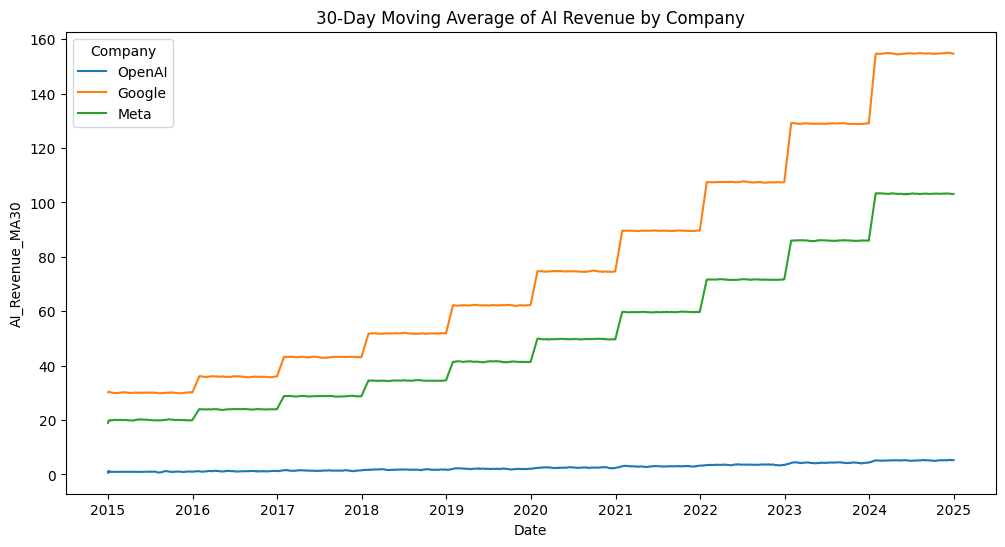

In [15]:
# Rolling Average of AI Revenue
df['AI_Revenue_MA30'] = df.groupby("Company")['AI_Revenue_USD_Mn'].transform(lambda x: x.rolling(window=30, min_periods=1).mean())

plt.figure(figsize=(12,6))
sns.lineplot(x="Date", y="AI_Revenue_MA30", hue="Company", data=df)
plt.title("30-Day Moving Average of AI Revenue by Company")
plt.show()

In [17]:
# AI Revenue
ai_revenue = df['AI_Revenue_USD_Mn'].values
print("Mean AI Revenue:", np.mean(ai_revenue))
print("Median AI Revenue:", np.median(ai_revenue))
print("Std Dev AI Revenue:", np.std(ai_revenue))
print("Min AI Revenue:", np.min(ai_revenue))
print("Max AI Revenue:", np.max(ai_revenue))
print("25th Percentile:", np.percentile(ai_revenue, 25))
print("75th Percentile:", np.percentile(ai_revenue, 75))

Mean AI Revenue: 44.12657085500502
Median AI Revenue: 35.22
Std Dev AI Revenue: 41.63745626417607
Min AI Revenue: -0.55
Max AI Revenue: 155.96
25th Percentile: 3.61
75th Percentile: 71.68


In [18]:
# AI Revenue Growth %
growth = df['AI_Revenue_Growth_%'].values
print("\nMean Growth:", np.mean(growth))
print("Std Growth:", np.std(growth))
print("Skewness approx:", (np.mean((growth - np.mean(growth))**3)) / (np.std(growth)**3))


Mean Growth: 159.395987772607
Std Growth: 135.4560047985247
Skewness approx: 0.5483761449814706


In [19]:
# 4. Company Level Aggregations
# -------------------------------
company_stats = df.groupby("Company").agg({
    "AI_Revenue_USD_Mn": ["mean", "max", "min", "sum"],
    "AI_Revenue_Growth_%": ["mean", "std"],
    "Stock_Impact_%": ["mean"]
})
print("\nCompany Stats:\n", company_stats)


Company Stats:
         AI_Revenue_USD_Mn                           AI_Revenue_Growth_%  \
                     mean     max    min        sum                mean   
Company                                                                   
Google          77.880750  155.96  28.70  284498.38          159.602313   
Meta            51.908519  104.60  18.44  189621.82          159.542223   
OpenAI           2.590443    6.65  -0.55    9462.89          159.043427   

                    Stock_Impact_%  
                std           mean  
Company                             
Google   132.251289       0.026209  
Meta     132.321714       0.009762  
OpenAI   141.634857       0.040709  


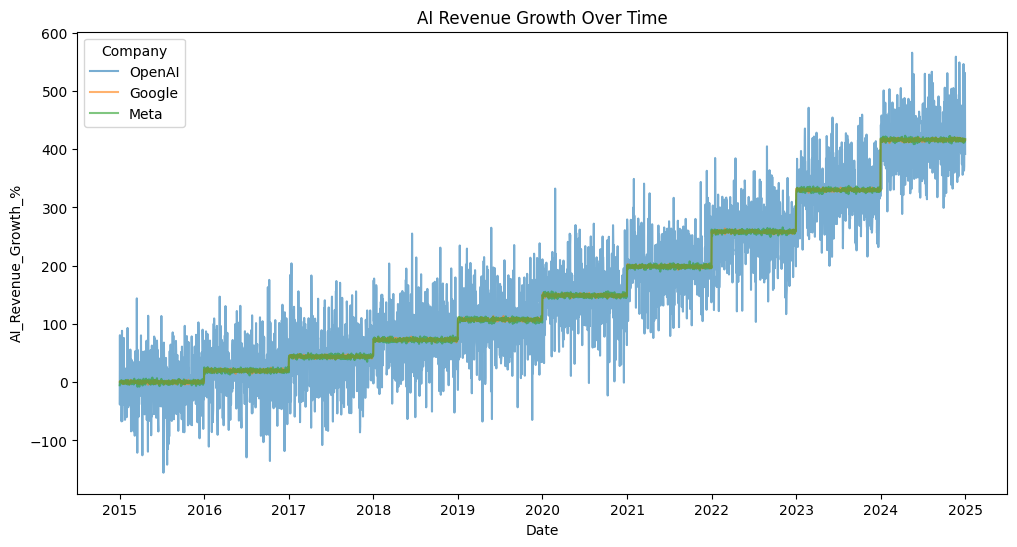

In [20]:
# Growth % over time
plt.figure(figsize=(12,6))
sns.lineplot(x="Date", y="AI_Revenue_Growth_%", data=df, hue="Company", alpha=0.6)
plt.title("AI Revenue Growth Over Time")
plt.show()

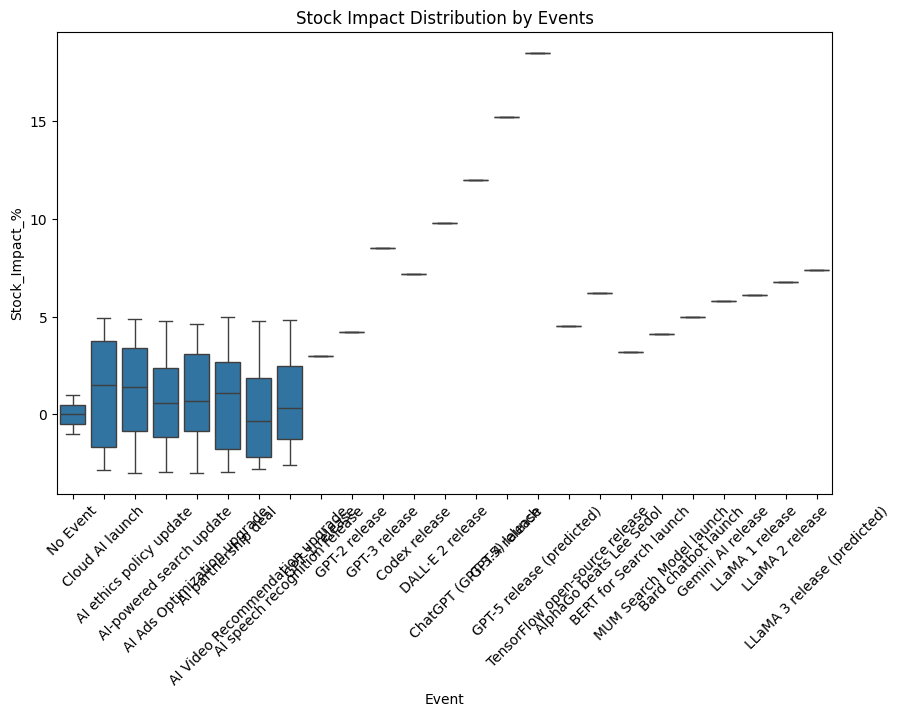

In [21]:
# Stock Impact by Events
plt.figure(figsize=(10,6))
sns.boxplot(x="Event", y="Stock_Impact_%", data=df)
plt.xticks(rotation=45)
plt.title("Stock Impact Distribution by Events")
plt.show()

Coefficient of Variation (AI Revenue): 0.9435914791791118
7-day Moving Average Sample: [1.03285714 1.14714286 0.93571429 0.95428571 1.08714286 0.92285714
 0.87428571 0.88142857 0.81285714 0.89142857]


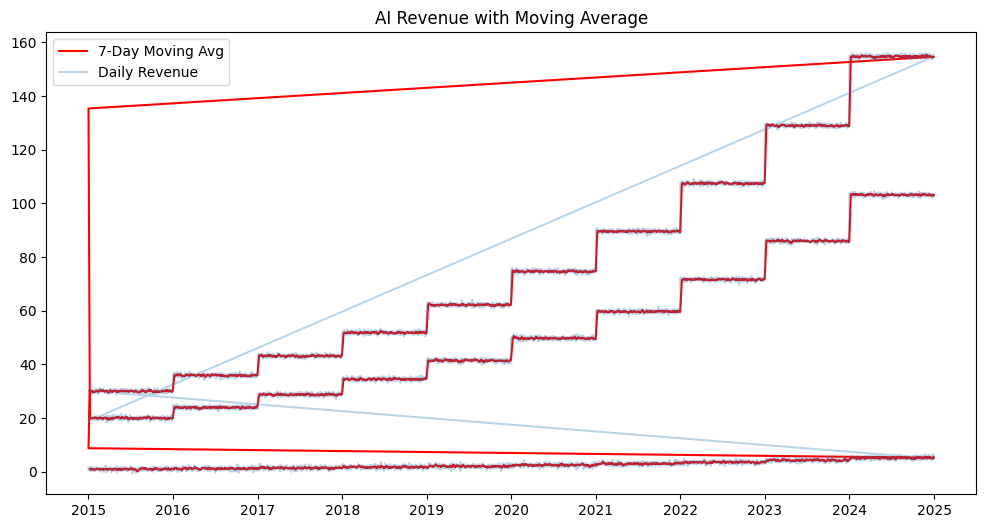

In [24]:
# Coefficient of Variation (Std / Mean)
cv_revenue = np.std(ai_revenue) / np.mean(ai_revenue)
print("Coefficient of Variation (AI Revenue):", cv_revenue)

# Moving Average (using convolution)
window = 7
moving_avg = np.convolve(ai_revenue, np.ones(window)/window, mode='valid')
print("7-day Moving Average Sample:", moving_avg[:10])

plt.figure(figsize=(12,6))
plt.plot(df['Date'].iloc[window-1:], moving_avg, label="7-Day Moving Avg", color="red")
plt.plot(df['Date'], ai_revenue, alpha=0.3, label="Daily Revenue")
plt.legend()
plt.title("AI Revenue with Moving Average")
plt.show()
